# Clustering
- Unsupervised Learning for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction 
- is used for identifying similar instances and assigning them to clusters, or groups of similar instances

> The vast majority of the available data is unlabeled

## Top 5 clustering algorithm
- K-Means
- Mean-shift
- DBSCAN (Density Based Spatial Clustering of Applications with Noise)
- EM-GM (Expectation Maximization Clustering using Gaussian Mixture Models)
- Agglomerative Hierarchical Clustering



## How to chose
- on elliptical clusters, Gaussian mixture models perform better than K-Means




### K-Means
> fast and scalable

computational complexity is generally linear, and therefore the fastest clustering algorithm


input features should be scaled
- improves the usability of the data (more spherical)

risk: unlucky centroid initialization 

if the data doesn't fit into memory:
- use `memmap` class
- `partial_fit()`

#### Centroid initialization methods
- Manually, when you know where the centroids are (e.g. if you run one before) `init`
- Run multiple times with different random initializations and keep the best solution `n_init`
    - automatically set to 10
    - performance metric: <b>inertia</b> (mean squared distance between each instance and the closest centroid)
- <b>K-Means++</b> (default): initiate centroids that are distant from one another
    - method reduces the number of times KMeans needs to run to find the optimal solution.
    1. place centroid randomly in the dataset
    2. place new centroid, considering the distance to the fist centroid
    3. repeat steps until all centroids are are placed
- Using <b>Elkan</b> distance (default)
- Mini-Batch: makes it possible to cluster huge datasets that do not fit into memory
    - implementation over `MiniBatchKMeans`
    - is faster and reduces computational cost, but its inertia is slightly worse (especially when number of clusters increases)
    

#### Finding the optimal number of clusters
- Elbow (rather coarse)
- `silhouette_score` (computationally expensive)
    - can vary between -1 and 1 
- `silhouette diagram`
    - hight: number of instances the cluster contains
    - width: sorted silhouette coefficients of the instances in the cluster (wider is better)
    - should include a dashed line which indicates the mean silhouette score 
    - If all of the clusters are above the dashed line than we should take this k 
    
### Limits of K-Means
- needs to run multiple times
- specify number of clusters beforehand
- doesn't like clusters that vary in size, different densities and nonspherical shapes

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# generate some blobs
# code from Hands On Machine Learning Book
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# function to plot blobs
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

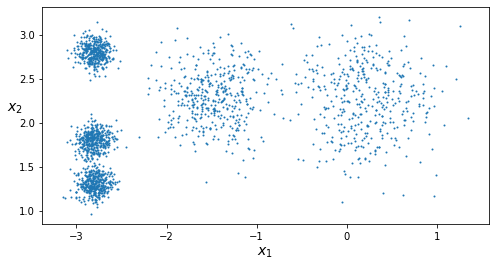

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### K-Means

In [7]:
# initiate KMeans with number of expected clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# use KMeans to get the clusters for the data 
ypred = kmeans.fit_predict(X)

In [10]:
# prediction for each datapoint
ypred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [11]:
# the location of the centroids
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

plot centroids

In [20]:
def plot_centroids(cluster, centroids):
    '''
    INPUT
        cluster: array with the data points 
        centroids: array with the centroids
    
    OUTPUT
        visualization with the data and the centroids    
    '''
    # Data
    plt.scatter(cluster[:, 0], cluster[:, 1], s=0.5)
    
    # centroids from KMeans
    plt.scatter(centroids[:, 0], centroids[:, 1])
    
    plt.show()

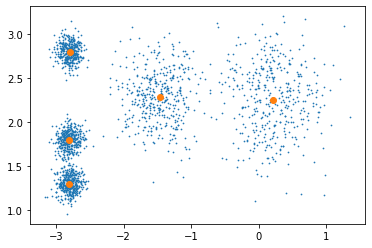

In [19]:
plot_centroids(X, kmeans.cluster_centers_)

> In this visualization you can clearly see that the centroids are perfectly in the middle of each cluster.

It is possible to plot the decision boundaries of each cluster

In [21]:
# check performace metric inertia
kmeans.inertia_

211.5985372581684

In [22]:
# is negative since a lower inertia score is better than a higher one
kmeans.score(X)

-211.59853725816856

## Project: Clustering stocks

## Resources
- Hands-On Machine Learning with Scikit-Learn and TensorFlow
- https://www.kdnuggets.com/2018/06/5-clustering-algorithms-data-scientists-need-know.html
- https://www.kdnuggets.com/2020/02/understanding-density-based-clustering.html
- https://towardsdatascience.com/machine-learning-for-stock-clustering-using-k-means-algorithm-126bc1ace4e1
